In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv("walmart_data.csv")

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Analysing the basic metrics

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### Insights

The amounts people spent on purchases show a big range. The smallest purchase was $12,

while the biggest one was as high as $23,961.

The middle point, or median purchase, is $8,047,

which is less than the average purchase amount of $9,264.

This suggests that the majority of purchases are lower in value, but there are a few very expensive purchases that make the average higher. It's like the data is leaning more towards the right side indicating a right-skewed distribution.

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


### Insights

Product_ID: In the 550,068 transactions, there are 3,631 different products. The product with the code P00265242 is the top seller, having sold a maximum of 1,880 units.

Gender: Among the 550,068 transactions, approximately 75% (414,259) were made by males. This indicates a significant difference in buying behavior between males and females during the Black Friday event.

Age: The dataset includes 7 unique age groups. The age group 26-35 has the highest number of transactions, with a total of 219,587. Further analysis of this age group will be conducted in the future.

Stay_In_Current_City_Years: Customers who have stayed in the current city for 1 year account for the highest number of transactions, reaching 193,821. This is more than customers who have stayed for 0, 2, 3, or 4+ years in the current city.


## Exploratory Data Analysis

In [ ]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe(include="category").T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


### Insights

User_ID: Out of 550,068 transactions, there are 5,891 unique user IDs. This suggests that some customers made multiple purchases.

In [ ]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

In [ ]:
df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [ ]:
(df['Marital_Status'].value_counts()/ len(df) )*100

Unmarried    59.034701
Married      40.965299
Name: Marital_Status, dtype: float64

### Insights

Marital_Status: Unmarried customers made up 59% of the total transactions, while married customers accounted for 41%.

## Duplicate Detection

In [ ]:
df[df.duplicated()==True]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df.duplicated().value_counts()

False    550068
dtype: int64

### Insights

There are no duplicate entries in the dataset

## Checking for Missing Values

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Insights

The dataset does not contain any missing values.

## Non-Graphical Analysis(Counting Values and Unique attributes)

In [ ]:
for i in df.columns:
  print('The count of unique values in',i,'are')
  print(df[i].nunique())
  print('-'*70)

The count of unique values in User_ID are
5891
----------------------------------------------------------------------
The count of unique values in Product_ID are
3631
----------------------------------------------------------------------
The count of unique values in Gender are
2
----------------------------------------------------------------------
The count of unique values in Age are
7
----------------------------------------------------------------------
The count of unique values in Occupation are
21
----------------------------------------------------------------------
The count of unique values in City_Category are
3
----------------------------------------------------------------------
The count of unique values in Stay_In_Current_City_Years are
5
----------------------------------------------------------------------
The count of unique values in Marital_Status are
2
----------------------------------------------------------------------
The count of unique values in Product_Ca

In [ ]:
for i in df.columns:
  print('The Unique Values in',i,'are')
  print(df[i].value_counts())
  print('-'*70)

The Unique Values in User_ID are
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
----------------------------------------------------------------------
The Unique Values in Product_ID are
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64
----------------------------------------------------------------------
The Unique Values in Gender are
M    414259
F    135809
Name: Gender, dtype: int64
----------------------------------------------------------------------
The Unique Values in Age are
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
---------

Observations


*   User_ID - Out of 550,068 transactions, there are 5,891 unique user IDs. This suggests that some customers made multiple purchases.

*   Product_ID - In the 550,068 transactions, there are 3,631 unique products. The product with the code P00265242 is the top seller, with 1,880 units sold.

*  Gender - Among 550,068 transactions, 414,259 (about 75%) were made by males. This indicates a significant difference in shopping behavior between males and females on Black Friday.

*   Age - The dataset includes 7 different age groups. The 26-35 age group has the highest number of transactions, totaling 219,587. Further analysis of this feature will be conducted in the future.

*   Stay_In_Current_City_Years - Customers who have stayed in their current city for 1 year have the highest number of transactions, totaling 193,821, compared to customers with 0, 2, 3, or 4+ years of stay in the current city.

*   Marital_Status - Unmarried customers accounted for 59% of total transactions, while married customers accounted for 41%.

## Outliers detection

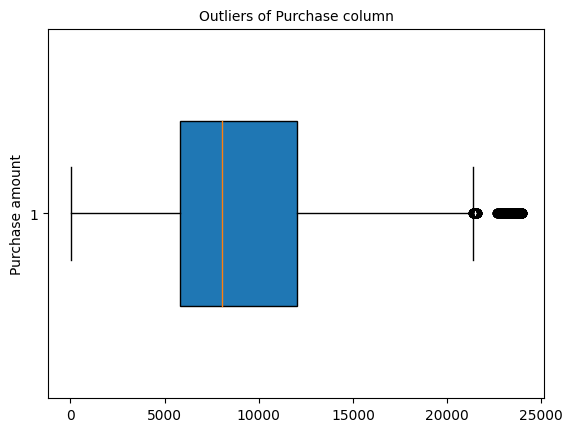

In [ ]:
plt.boxplot(x=df["Purchase"],vert = False,patch_artist = True,widths = 0.5)
plt.title("Outliers of Purchase column",fontsize=10)
plt.ylabel("Purchase amount")
plt.show()

### Calculating the IQR

In [ ]:
q1 = np.percentile(df["Purchase"],25)
q3 = np.percentile(df["Purchase"],75)
IQR = q3-q1
Upper_band = q3+1.5*(IQR)
Lower_band = q1-1.5*(IQR)
Median = df["Purchase"].median()
print("Q1=", q1)
print("Q3=", q3)
print("IQR=", IQR)
print("Upper band=", Upper_band)
print("Lower band=", Lower_band)
print("Median", df["Purchase"].median())

Q1= 5823.0
Q3= 12054.0
IQR= 6231.0
Upper band= 21400.5
Lower band= -3523.5
Median 8047.0


In [ ]:
# All values above the upper band i.e >21400.5 are outliers.

In [ ]:
len(df.loc[df['Purchase'] > 21400.5,'Purchase'])

2677

In [ ]:
(len(df.loc[df['Purchase']>Upper_band])/len(df))*100

0.4866671029763593

### Observations
There are 2677 outliers in the purchase amount column i.e 0.48% values in the Purchase column are outliers.

## Univariate Analysis

**Purchase Amount Distribution**

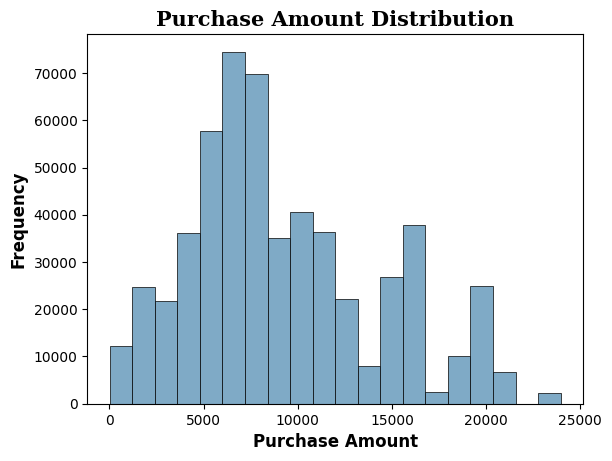

In [ ]:
plt.hist(df['Purchase'],color= '#7faac6',linewidth=0.5,edgecolor='black',bins = 20,)
plt.xlabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')

plt.title('Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

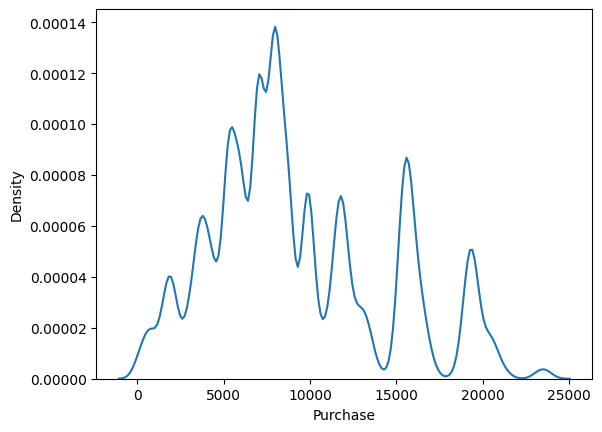

In [ ]:
sns.kdeplot(df['Purchase'])
plt.show()

Observations


*   Most order values lies in the range of 5000 - 10000
*   There are more orders in the range 15000 - 16000 followed by 11000 - 11500 range and a few also in the 19000 - 20000 range.





**Gender Distribution**

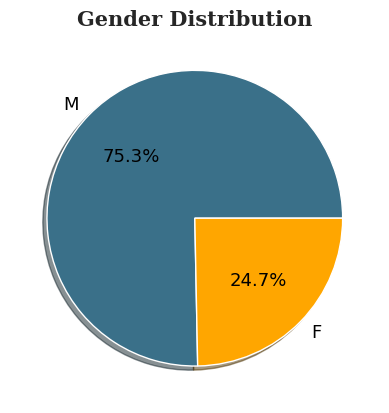

In [ ]:
sns.set_style("whitegrid")
color_map = ["#3A7089","#ffa600"]
plt.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

plt.title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

The data shows a big difference in how much males and females bought things during Black Friday. About 75.3% of the purchases were made by males, and only 24.7% were made by females.

**Marital Status Distribution**

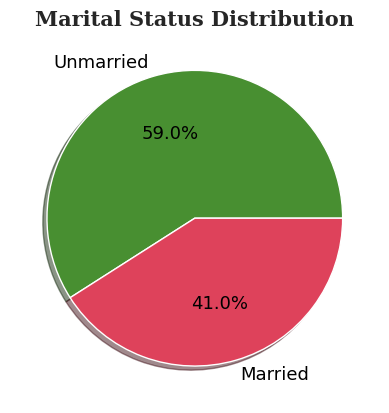

In [ ]:
sns.set_style("whitegrid")
color_map = ["#488f31","#de425b"]
plt.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})
plt.title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

About 59%, were made by unmarried customers compared to married couples, who made up 41% of the purchases.

**City Category Distribution**

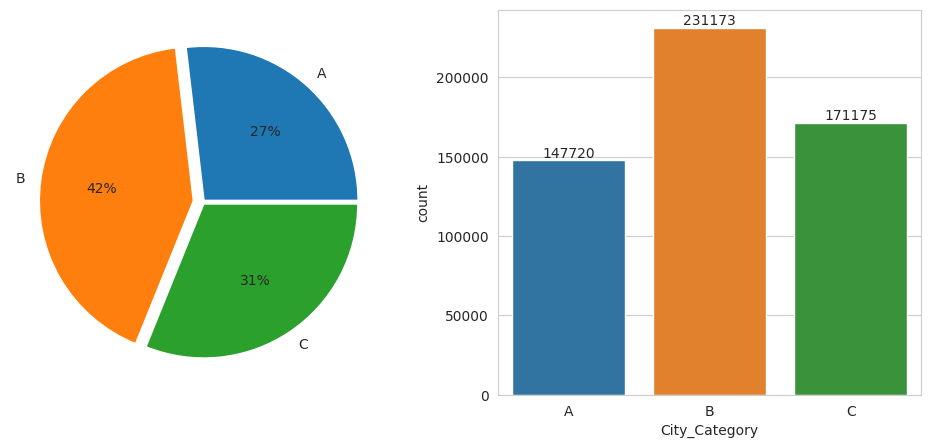

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("white")

plt.subplot(1,2,1)
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)

plt.show()

City B had the most transactions, making up 42% of the total. Following that, City C had 31.1%, and City A had 26.9%.

**Product Category Distribution**

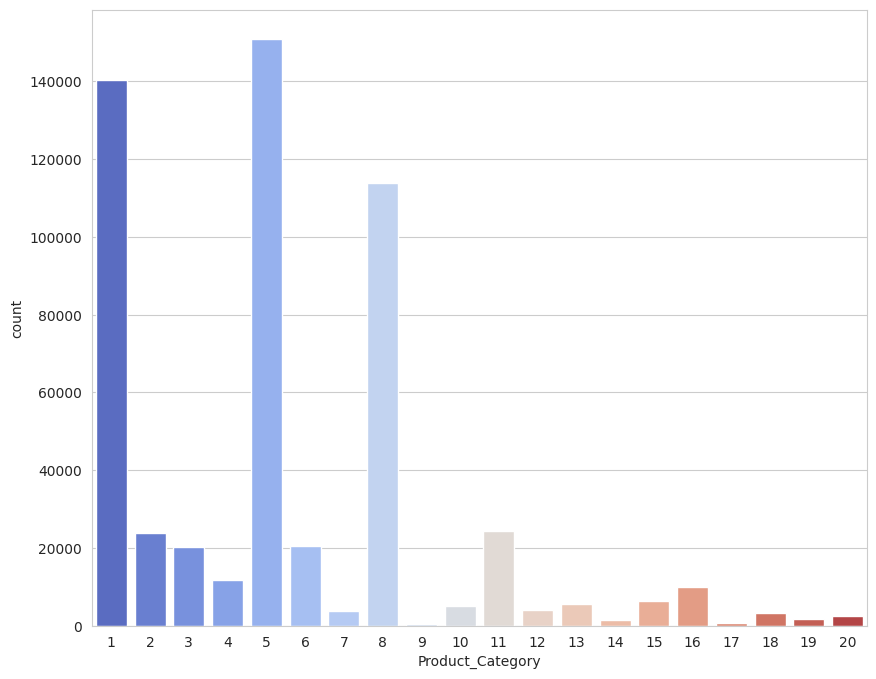

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category',palette ="coolwarm")
plt.show()

Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.

The least frequent bought are category 9 followed by 17 and 14.

**Age Distribution**

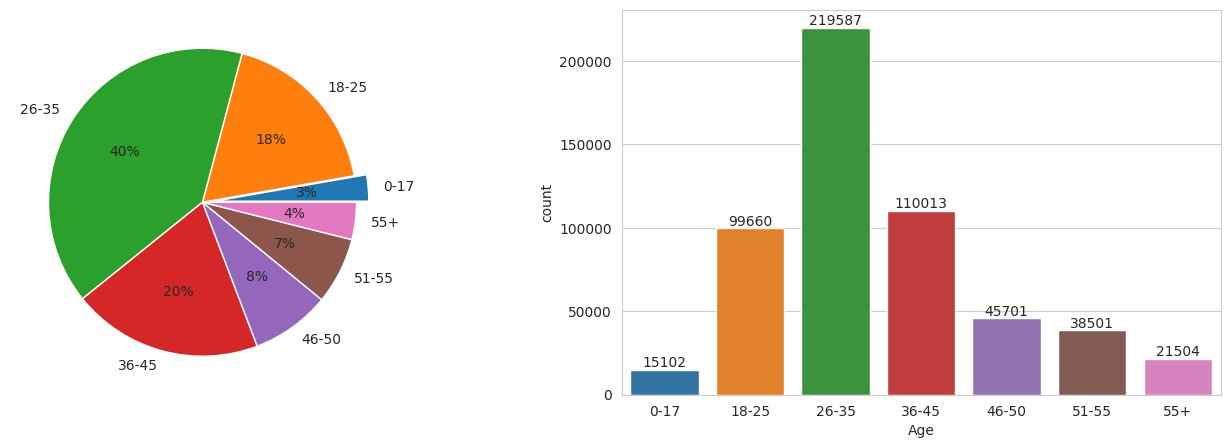

In [ ]:
plt.figure(figsize = (17,5)).set_facecolor("white")

plt.subplot(1,2,1)
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)

plt.show()

The largest group of buyers, making up 40%, falls in the age range of 26-35,
which is the highest among all age groups.

Buyers in the age groups 0-17 and 55+ are not as common, representing only 3% and 4% of the data, respectively.

It's noticeable that most buyers are between the ages of 18 and 45. Before and after this range, there are fewer buyers.

**Occupation distribution**

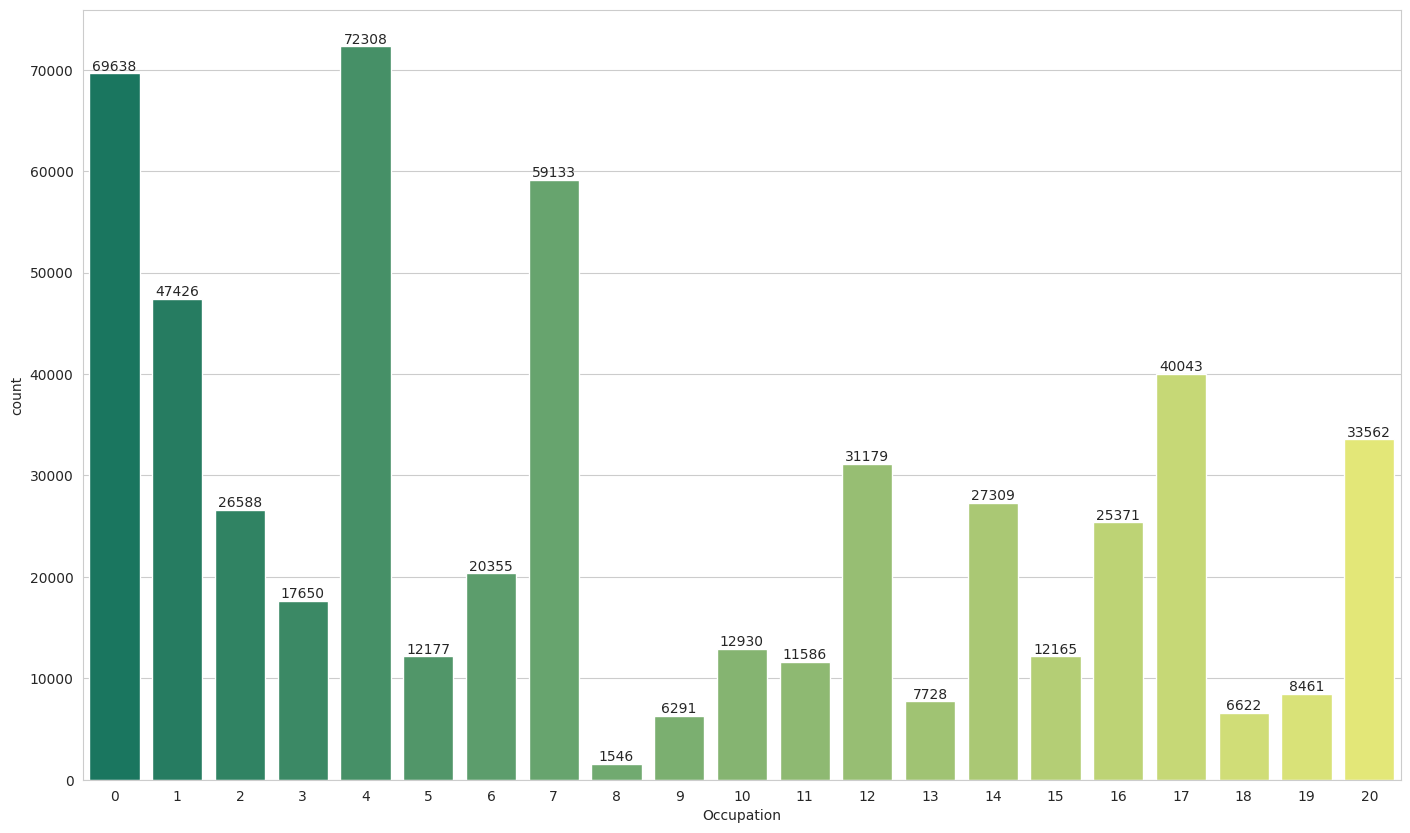

In [ ]:
plt.figure(figsize=(17, 10)).set_facecolor("white")
label = sns.countplot(data = df, x=df['Occupation'], palette ="summer")
for i in label.containers:
    label.bar_label(i)

The most common buyers have occupation code 4, with occupation codes 0 and 7 following closely behind. On the other hand, people with occupation code 8 are the least frequent buyers.

**Distribution of Customer's stay in current city**

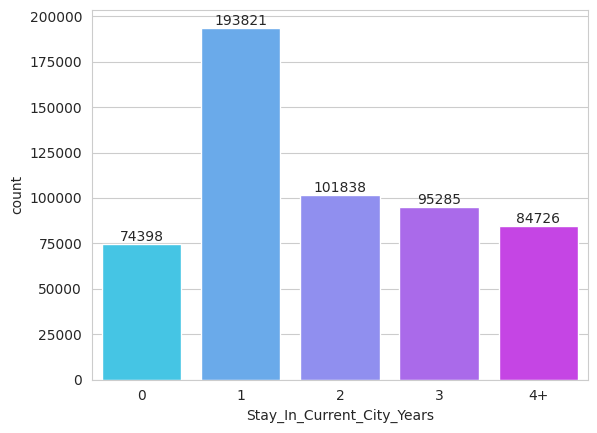

In [ ]:
df['Stay_In_Current_City_Years'].unique()
label = sns.countplot(data = df, x='Stay_In_Current_City_Years', palette = "cool")
for i in label.containers:
    label.bar_label(i)

Most buyers are in their current cities since 1 year followed by 2 years and 3 years.

**Top 10 Product ID with maximum sales.**

Text(0.5, 1.0, 'Product_ID with Maximum Sales')

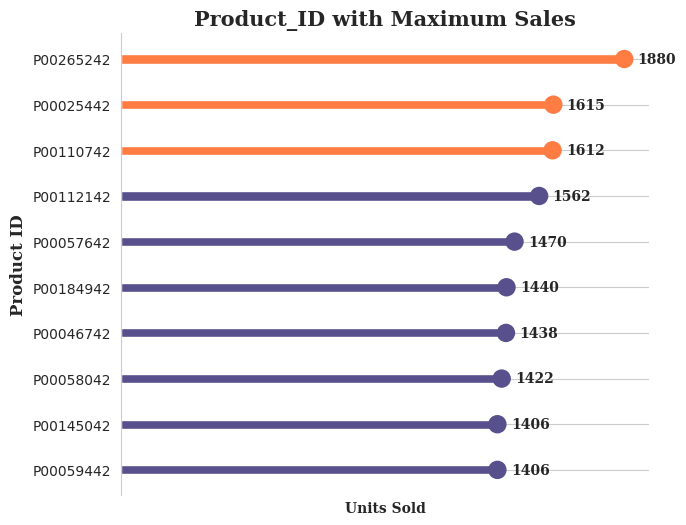

In [ ]:
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)
ax = fig.add_subplot(gs[0,0])

temp = df['Product_ID'].value_counts()[0:10]

temp = temp.iloc[-1:-11:-1]

color_map =  ["#58508d" for i in range(7)] + ['#ff7c43' for i in range(3)]

ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )


ax.set_xticks([])

for y,x in zip(temp.index,temp.values):
    ax.text( x + 50 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})

ax.set_title('Product_ID with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})



*   The best-selling products in Walmart's Black Friday sales include the item with ID P00265242 leading the way, selling 1,880 units. Following closely are P00025442 with 1,615 units sold and P00110742 with 1,612 units sold.




## Bi-variate Analysis

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


**Purchase vs Age**

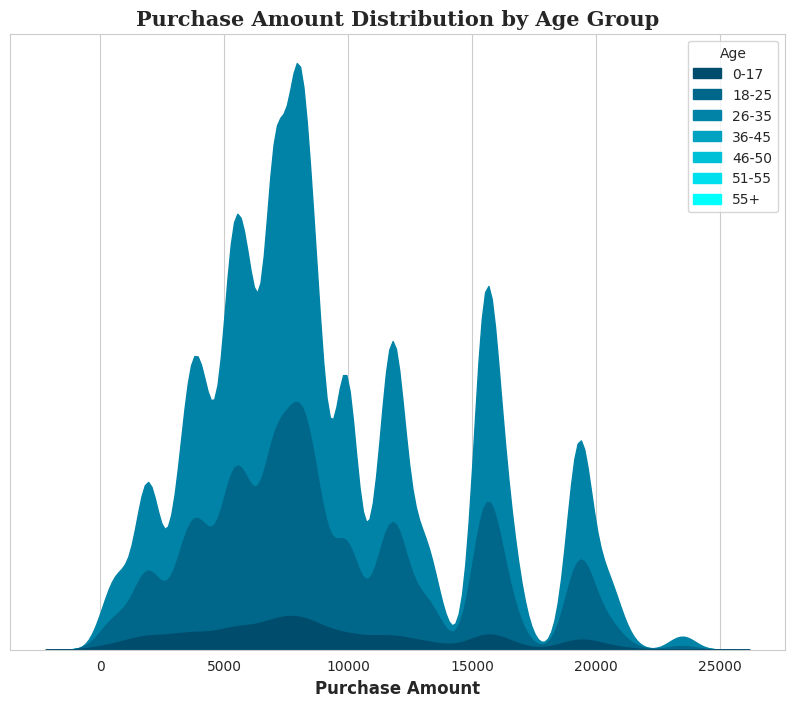

In [ ]:
color_map = ["#004c6d","#00678a","#0083a6","#00a1c1","#00c0d8","#00dfed","#00ffff"]
plt.figure(figsize=(10,8))
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age', palette = color_map, fill = True, alpha = 1)

plt.yticks([])
plt.ylabel('')
plt.xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

plt.title('Purchase Amount Distribution by Age Group',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

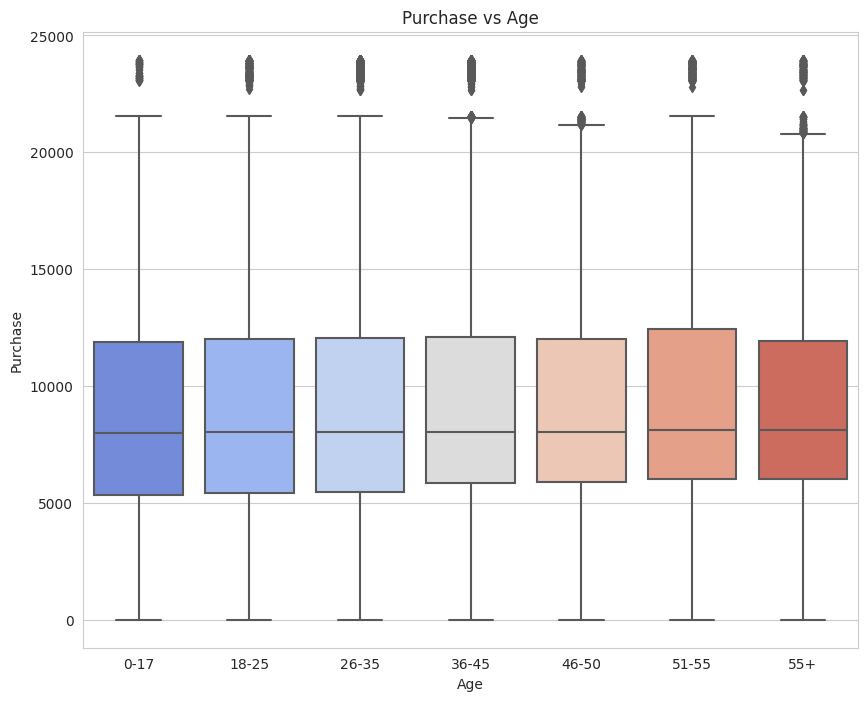

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, y ='Purchase', x = 'Age', palette = 'coolwarm')
plt.title('Purchase vs Age')
plt.show()

In [ ]:
df.groupby(["Age"])["Purchase"].describe().T

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
count,15102.000000,99660.000000,219587.000000,110013.000000,45701.000000,38501.000000,21504.000000
mean,8933.464640,9169.663606,9252.690633,9331.350695,9208.625697,9534.808031,9336.280459
std,5111.114046,5034.321997,5010.527303,5022.923879,4967.216367,5087.368080,5011.493996
min,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
25%,5328.000000,5415.000000,5475.000000,5876.000000,5888.000000,6017.000000,6018.000000
50%,7986.000000,8027.000000,8030.000000,8061.000000,8036.000000,8130.000000,8105.500000
75%,11874.000000,12028.000000,12047.000000,12107.000000,11997.000000,12462.000000,11932.000000
max,23955.000000,23958.000000,23961.000000,23960.000000,23960.000000,23960.000000,23960.000000


* Among different age groups, the age range of 51-55 exhibits the highest average order value, reaching approximately 9534. Conversely, the age group 0-17 has the lowest average order value, around 8933.

* The highest order value observed across all age groups is approximately 23960, highlighting the peak spending level. On the other end, the lowest order value, consistent across all groups, is 12.

**Purchase vs Occupation**

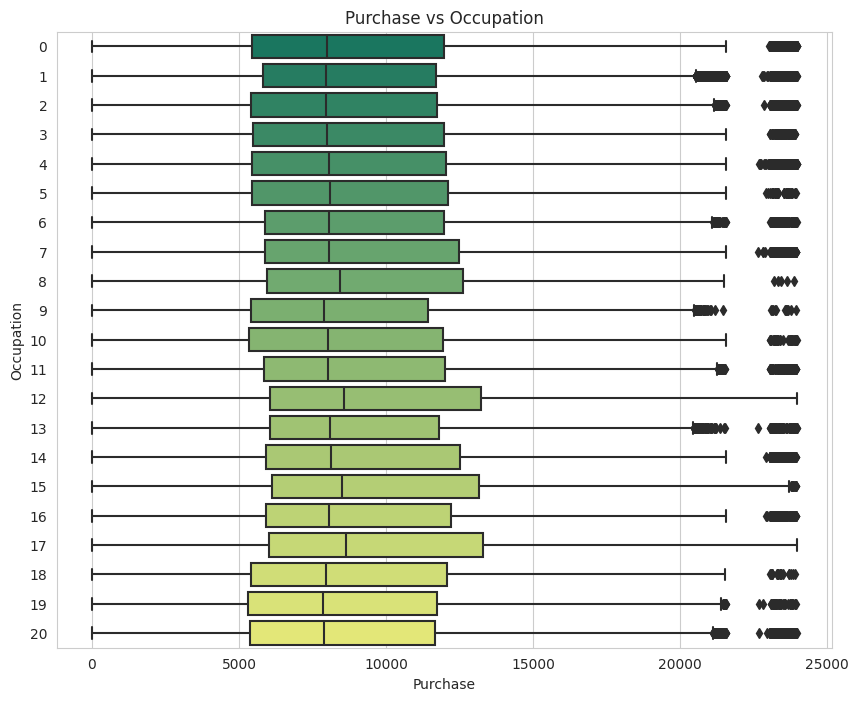

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, x ='Purchase', y = 'Occupation', palette = 'summer')
plt.title('Purchase vs Occupation')
plt.show()

In [ ]:
df.groupby(["Occupation"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


* The dataset contains numerous outliers.
* The occupation with the highest median value is occupation 17, indicating a concentration of values around a central point. Conversely, occupation 19 has the lowest median value.

* Occupation 17 stands out with the highest average order values, reaching 9821, indicating a tendency for higher spending. On the other hand, occupation 9 has the lowest average order value, totaling 8637, pointing to comparatively lower spending patterns in this occupation group.

**Purchase vs Gender**

<Figure size 1200x800 with 0 Axes>

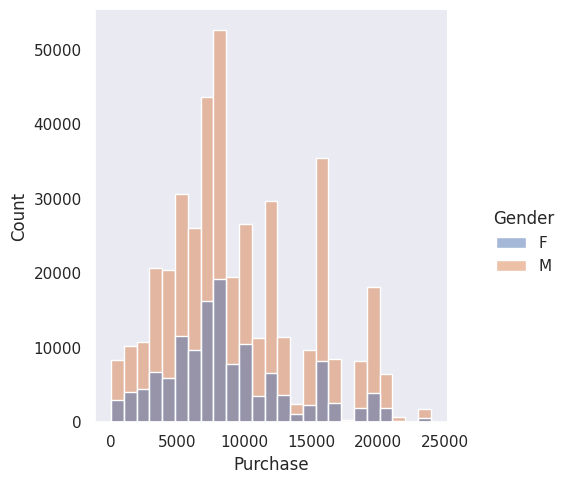

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='dark')
sns.displot(x= 'Purchase',data=df,hue='Gender',bins=25)
plt.show()

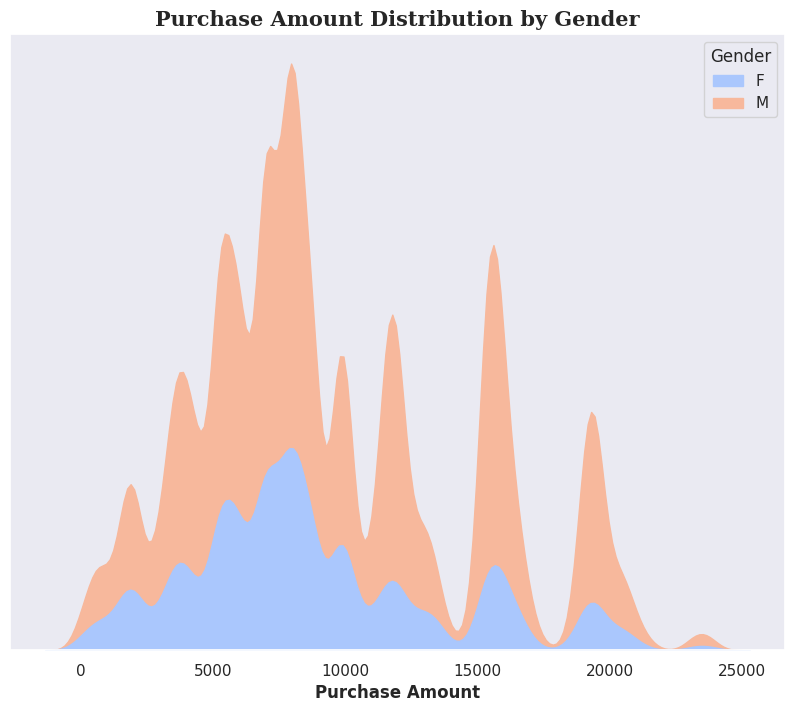

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df, x = 'Purchase', hue = 'Gender', palette = 'coolwarm',fill = True, alpha = 1)

plt.yticks([])
plt.ylabel('')
plt.xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

plt.title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

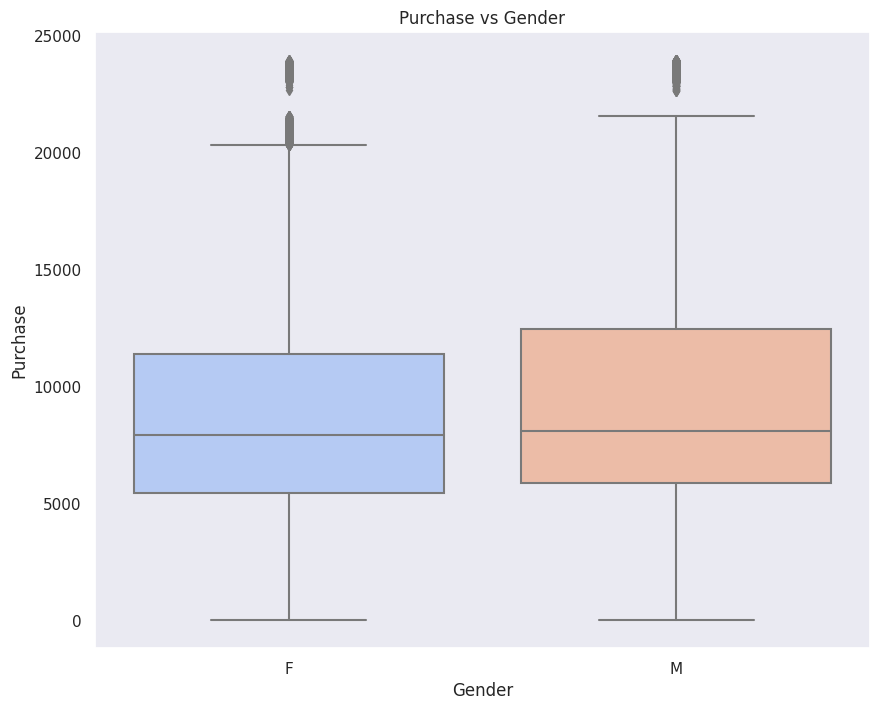

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, y ='Purchase', x = 'Gender', palette = 'coolwarm')
plt.title("Purchase vs Gender")
plt.show()

In [ ]:
df.groupby(['Gender'])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


* Males tend to spend more than females in the observed data. On average, the order value for males is 9437, whereas for females, it is slightly lower at 8734.

* Most male purchases cluster around an average order value of 8098, suggesting a common spending pattern. Similarly, for females, the majority of purchases center around an average order value of 7914.

**Purchase vs Marital Status**

<Figure size 1200x800 with 0 Axes>

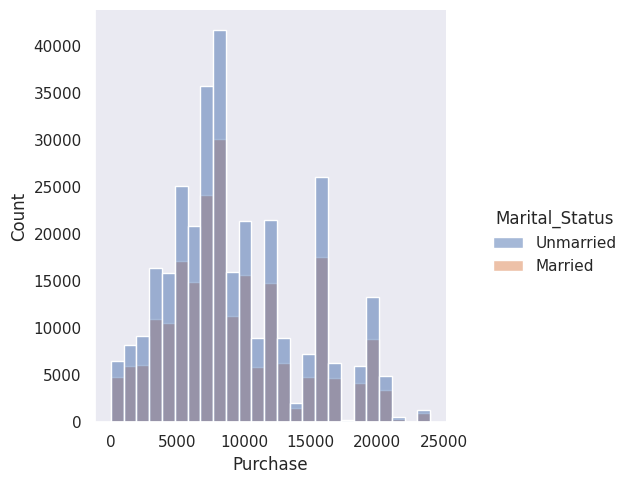

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='dark')
sns.displot(x= 'Purchase',data=df,hue='Marital_Status',bins=25)
plt.show()

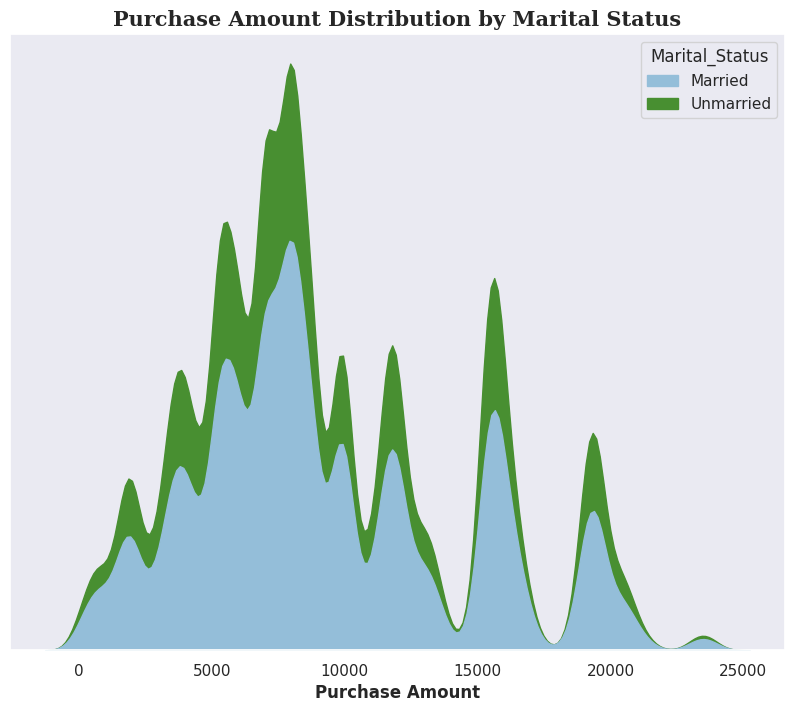

In [ ]:
color_map = ["#94bed9","#488f31"]
plt.figure(figsize=(10,8))
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status', palette = color_map,fill = True, alpha = 1,hue_order = ['Married','Unmarried'])

plt.yticks([])
plt.ylabel('')
plt.xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

plt.title('Purchase Amount Distribution by Marital Status',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

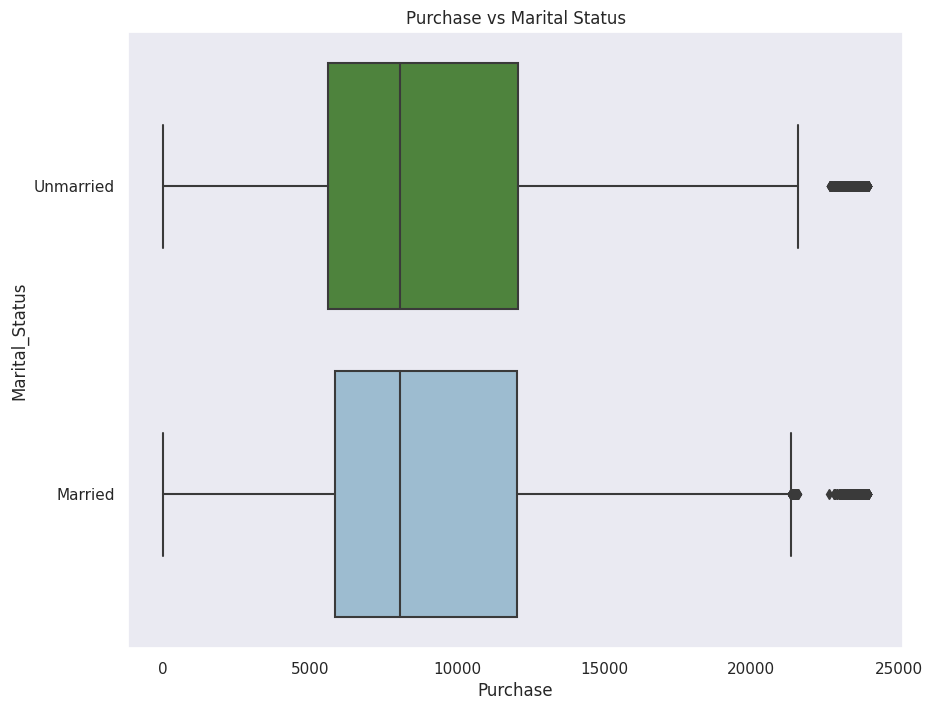

In [ ]:
color_map = ["#488f31","#94bed9"]
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, x ='Purchase', y = 'Marital_Status', palette = color_map)
plt.title("Purchase vs Marital Status")
plt.show()

In [ ]:
df.groupby(["Marital_Status"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


* The median value is almost the same between married and unmarried people.

* Both types share identical minimum and maximum order values, suggesting uniformity in the range of spending behavior.

* The average order values is almost the same between married and unmarried people, indicating a similar overall spending pattern between the two groups.

**Purchase vs Product Category**

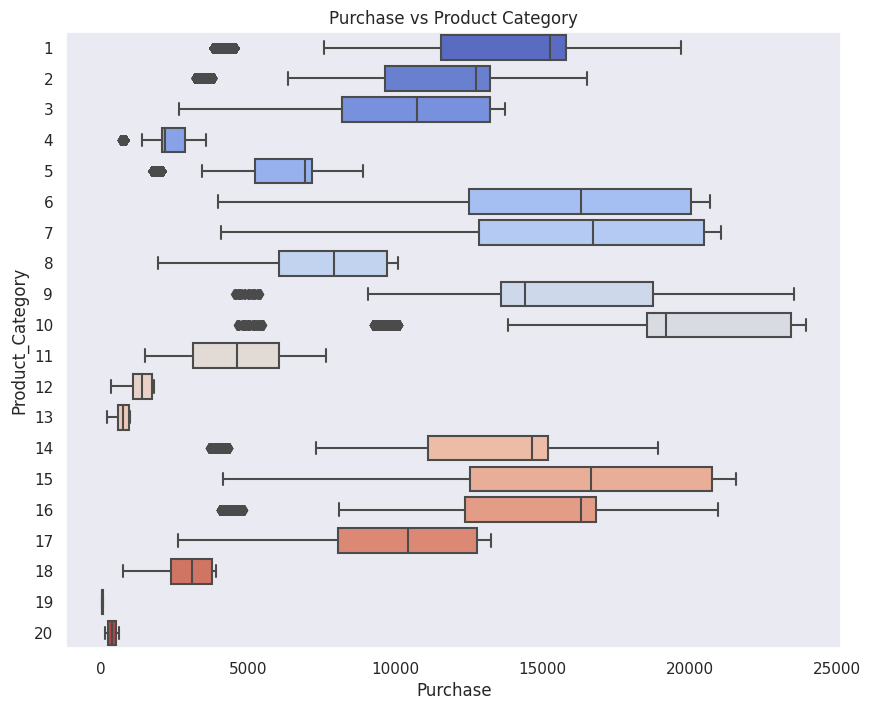

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, x ='Purchase', y = 'Product_Category', palette = 'coolwarm')
plt.title("Purchase vs Product Category")
plt.show()

In [ ]:
df.groupby(["Product_Category"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


* There is a huge differences in the median values for all the product categories.

* Among the observed product categories, category 10 stands out with the highest median value, reaching 19197. In contrast, category 19 has the lowest median value, merely 37.

* The average order value for category 10 is the highest, totaling 19675, highlighting a propensity for higher spending in this category. Conversely, category 19 has the lowest average order value, also 37, indicating lower overall spending in this particular category.

* Category 19 emerges as the least preferred or least frequently bought product category, given its lower median and average order values compared to other categories.

**Purchase vs City Category**

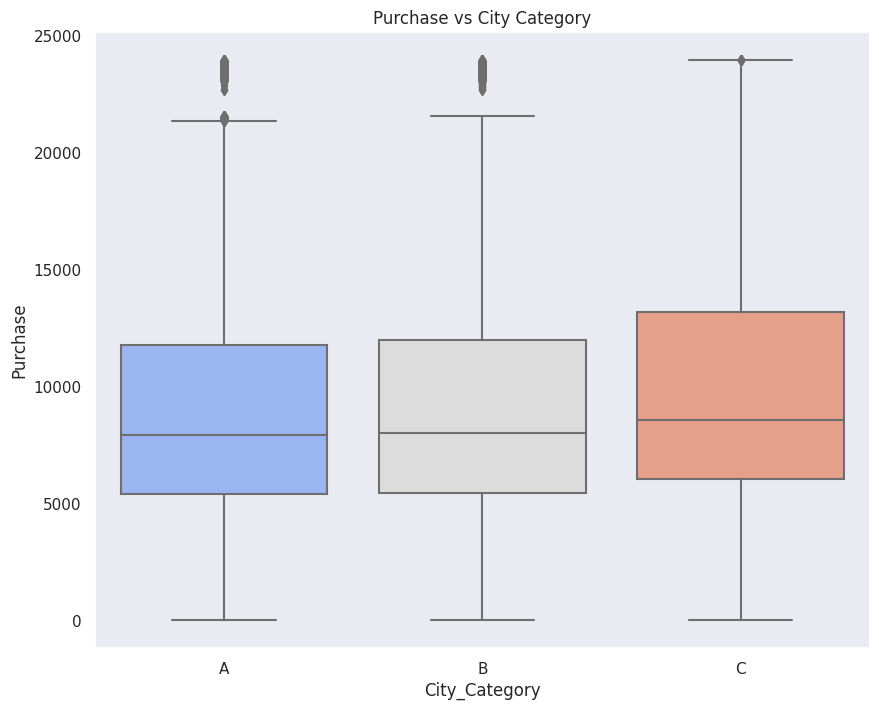

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'coolwarm')
plt.title("Purchase vs City Category")
plt.show()

In [ ]:
df.groupby(["City_Category"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


* City Category C takes the lead with the highest median order value, followed by City B and City A. This suggests a central tendency towards higher values in City C compared to the other two.

* The mean order value for City C is the highest, followed by City B and City A. This indicates that, on average, transactions in City C tend to have higher values compared to those in City B and City A.







**Purchase vs Stay in Current City**

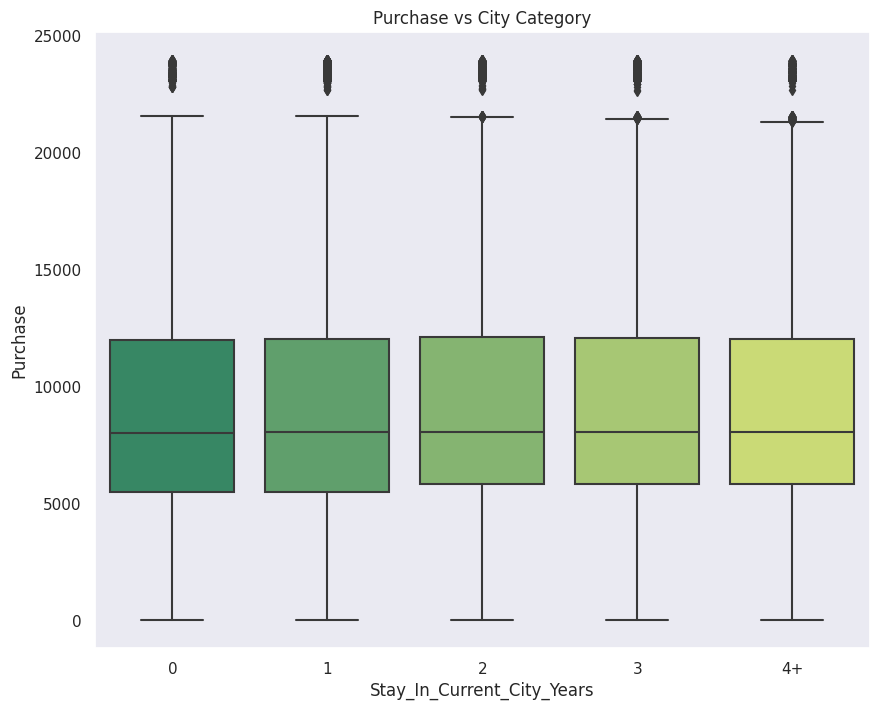

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("white")
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'summer')
plt.title("Purchase vs City Category")
plt.show()

In [ ]:
df.groupby(["Stay_In_Current_City_Years"])["Purchase"].describe().T

Stay_In_Current_City_Years,0,1,2,3,4+
count,74398.000000,193821.000000,101838.000000,95285.000000,84726.000000
mean,9180.075123,9250.145923,9320.429810,9286.904119,9275.598872
std,4990.479940,5027.476933,5044.588224,5020.343541,5017.627594
min,12.000000,12.000000,12.000000,12.000000,12.000000
25%,5480.000000,5500.000000,5846.000000,5832.000000,5844.000000
50%,8025.000000,8041.000000,8072.000000,8047.000000,8052.000000
75%,11990.000000,12042.000000,12117.000000,12075.000000,12038.000000
max,23960.000000,23961.000000,23961.000000,23961.000000,23958.000000


* Across all the years, there is uniformity in the median values, suggesting stability in the central tendency of order values.

* The average order values, falling within the range of 9180 to 9320, remain nearly identical across the observed years, indicating a consistent average spending pattern.

* The highest order value remains the same across all the years, suggesting a consistent spending habit regardless of the specific year.

## Multi-variate Analysis

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


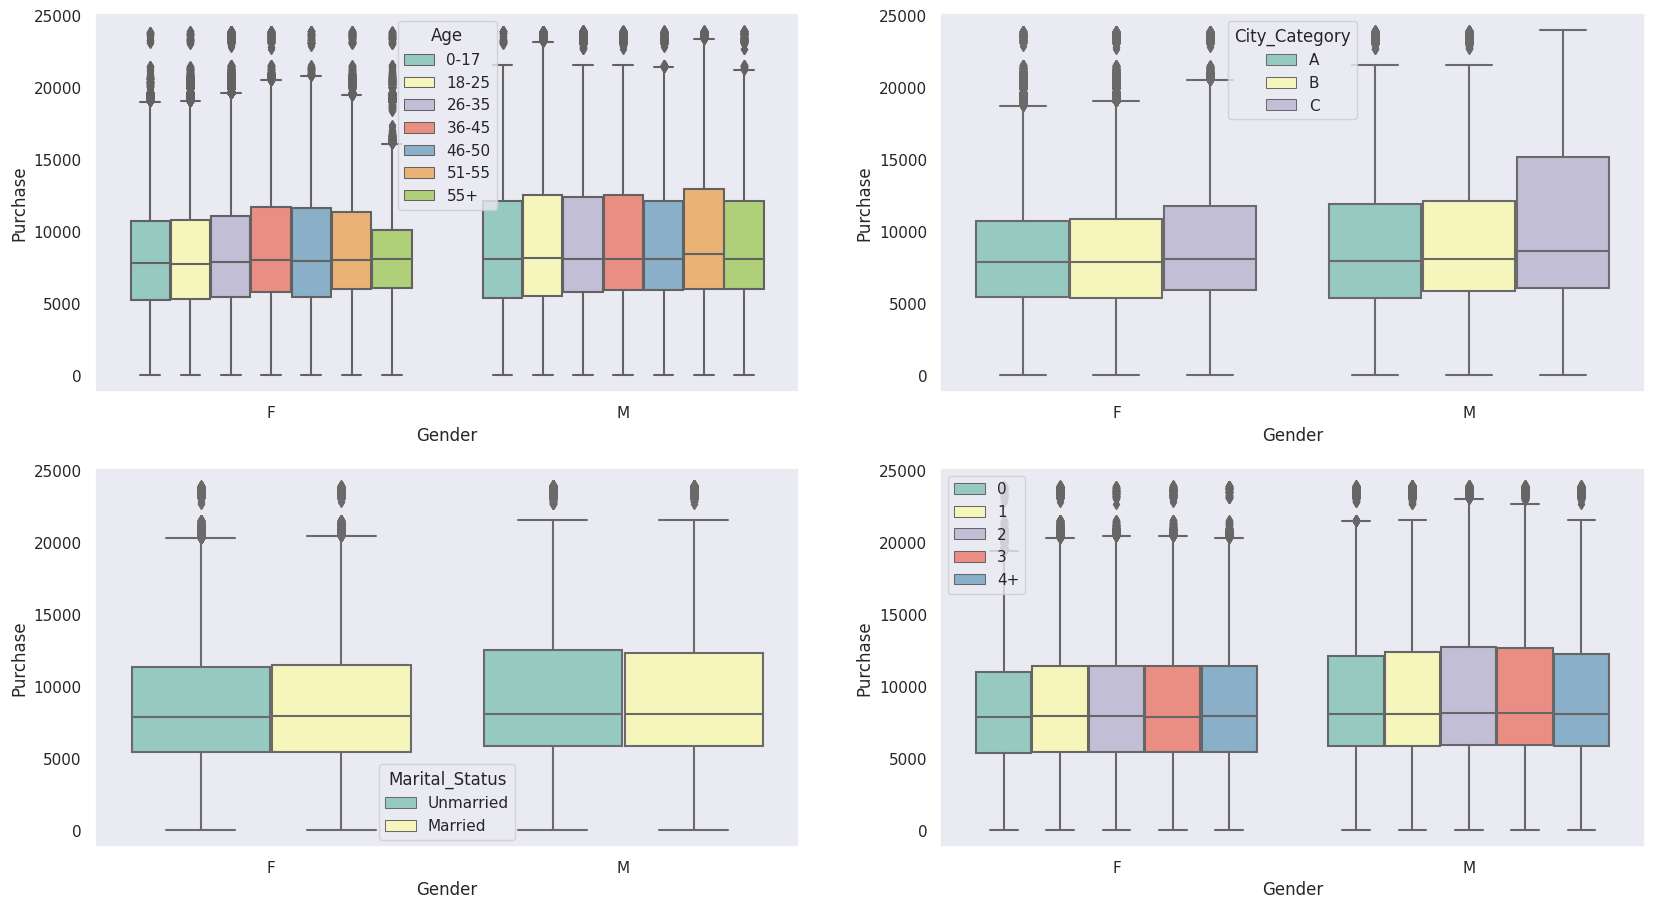

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

* Across age groups, the median values for females aged 18-25 are notably the lowest, while the medians for other age categories exhibit comparable values. Conversely, the highest median values are consistently observed in the 51-55 age group.

* Examining city categories, both females and males exhibit the highest median spending in city category C compared to cities A and B.

* Marital status appears to have no discernible impact on spending habits for both genders. However, it is noteworthy that median spending values for males tend to be higher than those for females.

* Delving into the duration of stay, female spending patterns reveal slightly lower median values for those residing for 0 and 3 years compared to other durations.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
col = ['Occupation','Product_Category']
df[col] = df[col].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 17.6 MB


<ipython-input-64-c29a8587184a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


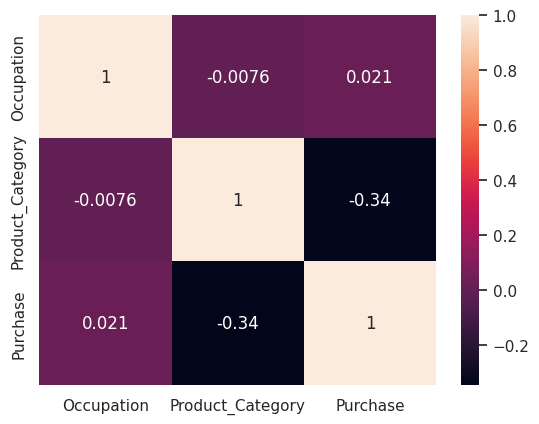

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

* The analysis reveals a negative correlation of -0.0076 between Product Category and Occupation, suggesting a potential relationship that merits further investigation.

* A positive correlation of 0.021 has been observed between Purchase and Occupation, indicating a mild association between these two variables in the context of the study.

* An impactful negative correlation of -0.34 has been identified between Product Category and Purchase, implying a potentially influential connection that merits closer scrutiny in understanding the dynamics between these aspects.








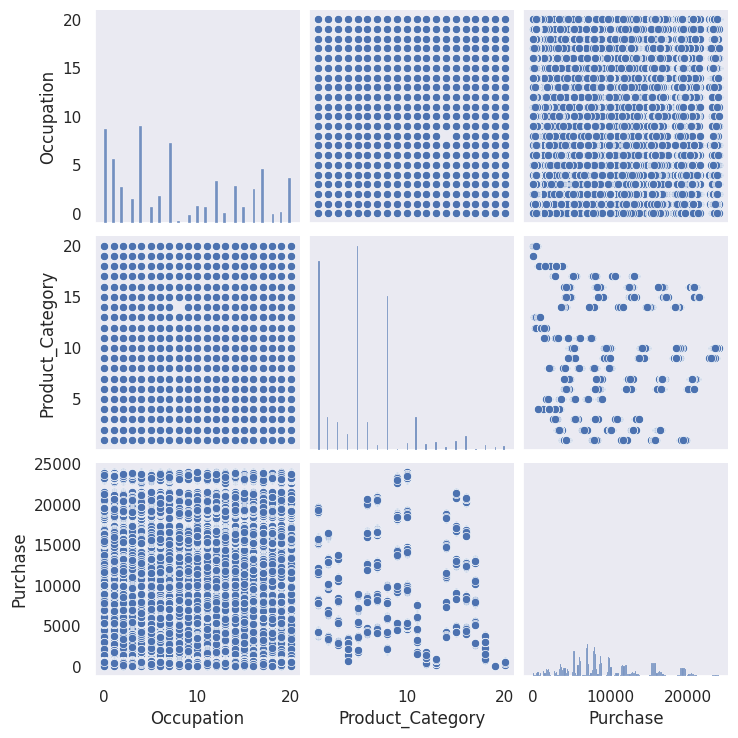

In [ ]:
sns.pairplot(df)
plt.show()

## Confidence Interval



The purchase amount distribution is not Normal. So we will be using Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution.


After building Central Limit Theorem (CLT) curve, we will create a confidence interval predicting population mean at 95% Confidence level.
Note - We will use three different sample sizes of [30,300,3000,30000]

**Gender Vs Purchase amount**

In [111]:
def confidence_interval(data,ci):
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [112]:
df_male = df.loc[df['Gender'] == 'M','Purchase']
df_female = df.loc[df['Gender'] == 'F','Purchase']
df_male.nunique()

17547

In [140]:
def plot(ci):

    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    sample_sizes = [(30,0,0),(300,0,1),(3000,1,0),(30000,1,1)]

    bootstrap_samples = 30000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = []
        female_means = []

        for j in range(bootstrap_samples):

            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})
        ax = fig.add_subplot(gs[x,y])
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#0083a6" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#ef5675" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#0083a6",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#ef5675",linestyle = '--')

        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_title(f'Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})
        plt.legend()
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples

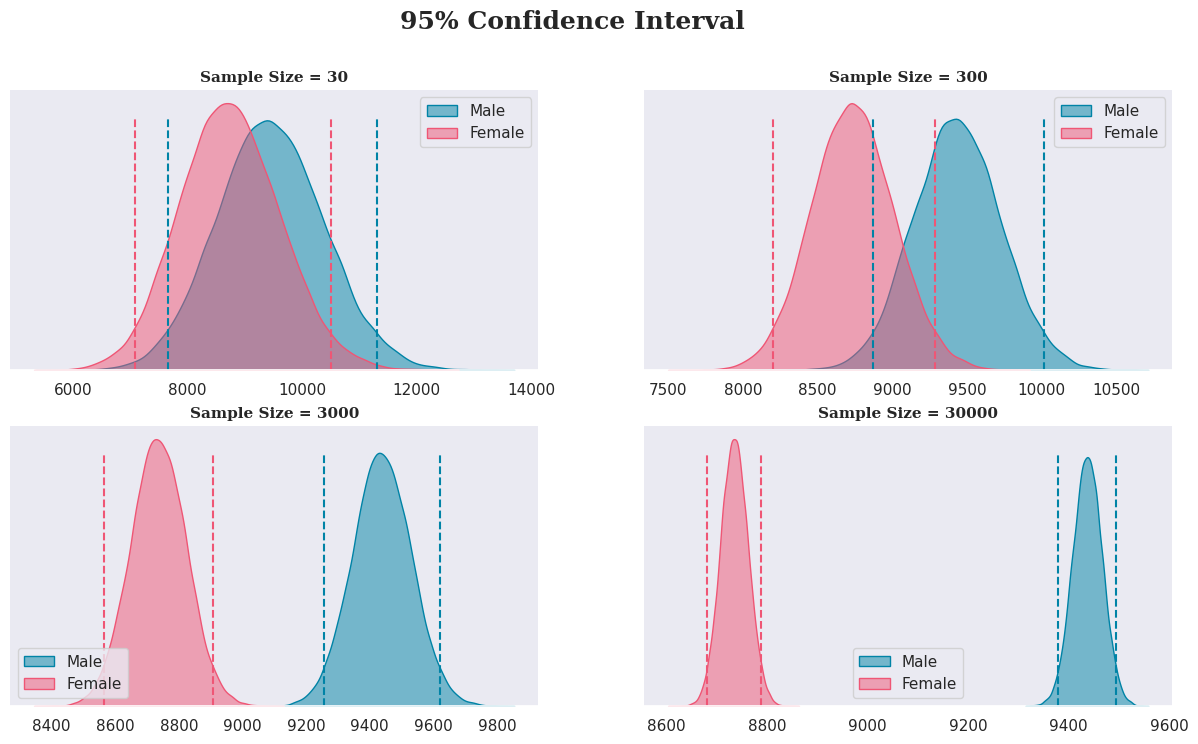

In [141]:
m_samp_95,f_samp_95 = plot(95)

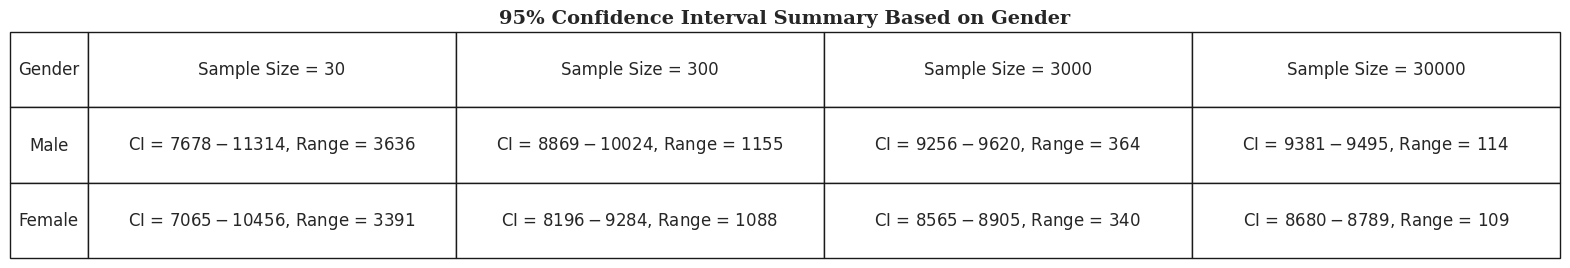

In [115]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_95,f_samp_95,95,1)]:
    m_ci = ['Male']
    f_ci = ['Female']

    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

    ax = fig.add_subplot(gs[l])

    ci_info = [m_ci,f_ci]

    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 30','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])
    table.set_fontsize(13)
    ax.axis('off')
    ax.set_title(f"{k}% Confidence Interval Summary Based on Gender",{'font':'serif', 'size':14,'weight':'bold'})

In [116]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [161]:
avg_amt_df = amt_df['Gender'].value_counts()
avg_amt_df

F    5891
M    5891
Name: Gender, dtype: int64

In [162]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
male_df

,User_ID,Gender,Purchase
1,1000001,M,0
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
...,...,...,...
11773,1006036,M,0
11775,1006037,M,0
11777,1006038,M,0
11779,1006039,M,0


In [144]:
male_df['Purchase'].std()

933096.7961923733

In [143]:
female_df['Purchase'].std()

535828.1658663888

In [149]:
print("Male - Sample mean:",male_df['Purchase'].mean(),"Sample std:", male_df['Purchase'].std())
print("Female - Sample mean:",female_df['Purchase'].mean(),"Sample std:",female_df['Purchase'].std())

Male - Sample mean: 663653.0470208793 Sample std: 933096.7961923733
Female - Sample mean: 201363.544729248 Sample std: 535828.1658663888


In [123]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (639825.01, 687481.08)
Female confidence interval of means: (187680.36, 215046.73)


**Observations**
* Population mean - Mean of sample means of amount spend for Male: 663474.53
* Population mean - Mean of sample means of amount spend for Female: 201373.07

* Male - Sample mean: 663653.05 Sample std: 933096.80
* Female - Sample mean: 201363.54 Sample std: 535828.17

**Marital Status Vs Purchase amount**

In [133]:
def plot(ci):
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)


    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    sample_sizes = [(30,0,0),(300,0,1),(3000,1,0),(30000,1,1)]

    bootstrap_samples = 30000

    married_samples = {}
    unmarried_samples = {}

    for i,x,y in sample_sizes:
        married_means = []
        unmarried_means = []

        for j in range(bootstrap_samples):

            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means


        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})


        ax = fig.add_subplot(gs[x,y])


        sns.kdeplot(data = temp_df,x = 'married_means',color ="#d44d4d" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#00ffff" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#d44d4d",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#00ffff",linestyle = '--')

        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        ax.set_title(f'Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return married_samples,unmarried_samples

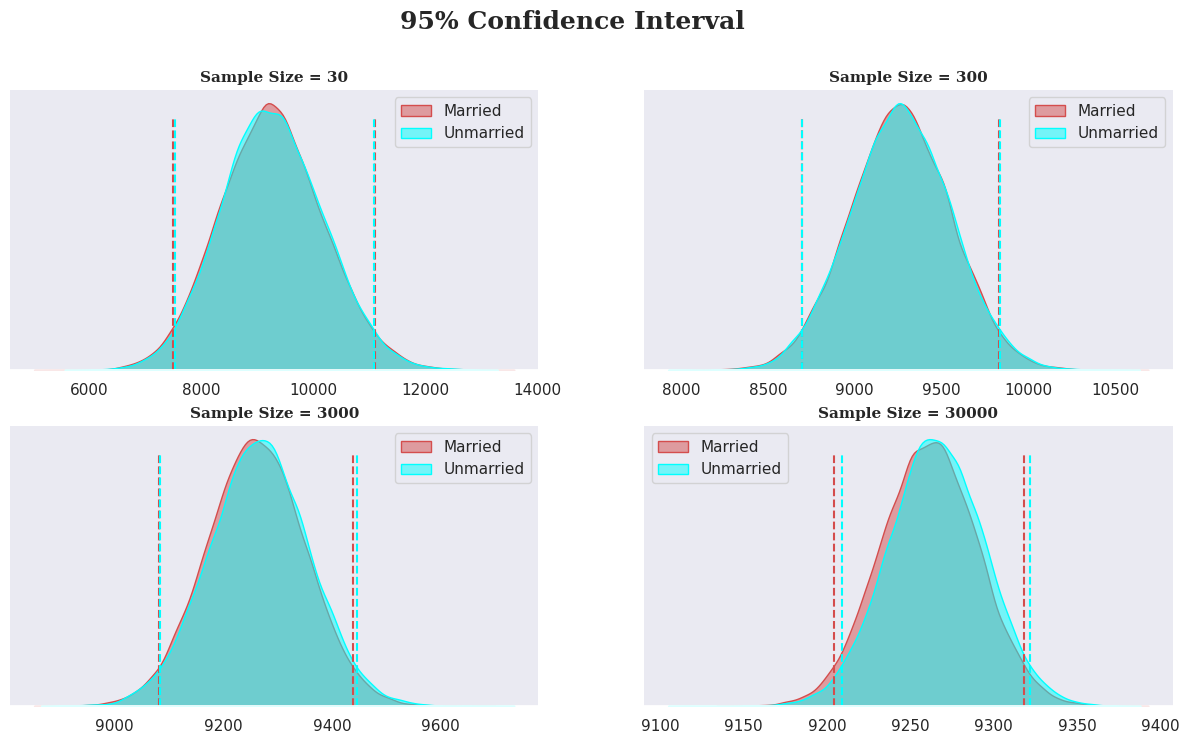

In [134]:
m_samp_95,u_samp_95 = plot(95)

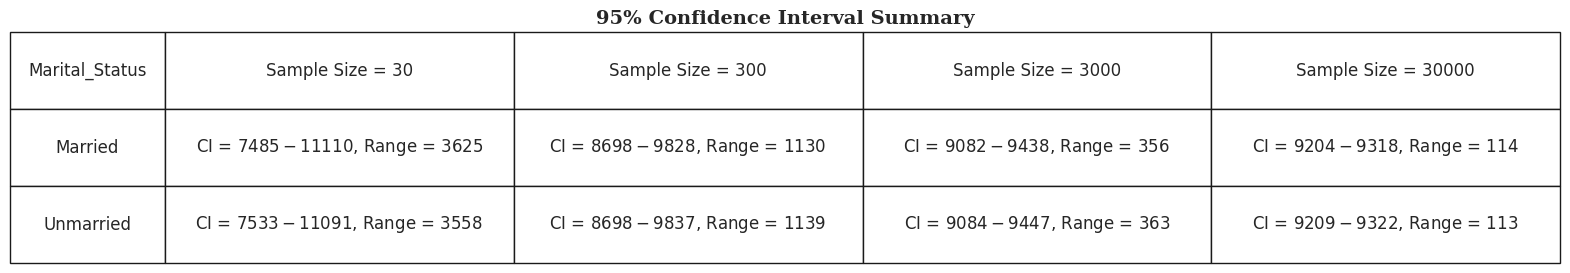

In [135]:
fig,ax = plt.subplots(figsize = (20,3))

m_ci = ['Married']
u_ci = ['Unmarried']

for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

ci_info = [m_ci,u_ci]

table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 30','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax.axis('off')
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})
plt.show()

**Age Group Vs Purchase amount**

In [151]:
df_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_age = df_age.reset_index()

df_age['Age'].value_counts()

0-17     5891
18-25    5891
26-35    5891
36-45    5891
46-50    5891
51-55    5891
55+      5891
Name: Age, dtype: int64

In [136]:
def plot(ci):
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']

    sample_sizes = [(30,0),(300,1),(3000,2),(30000,3)]
    bootstrap_samples = 30000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7


        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

        ax = fig.add_subplot(gs[x])

        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:

            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)

        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        ax.set_title(f'Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

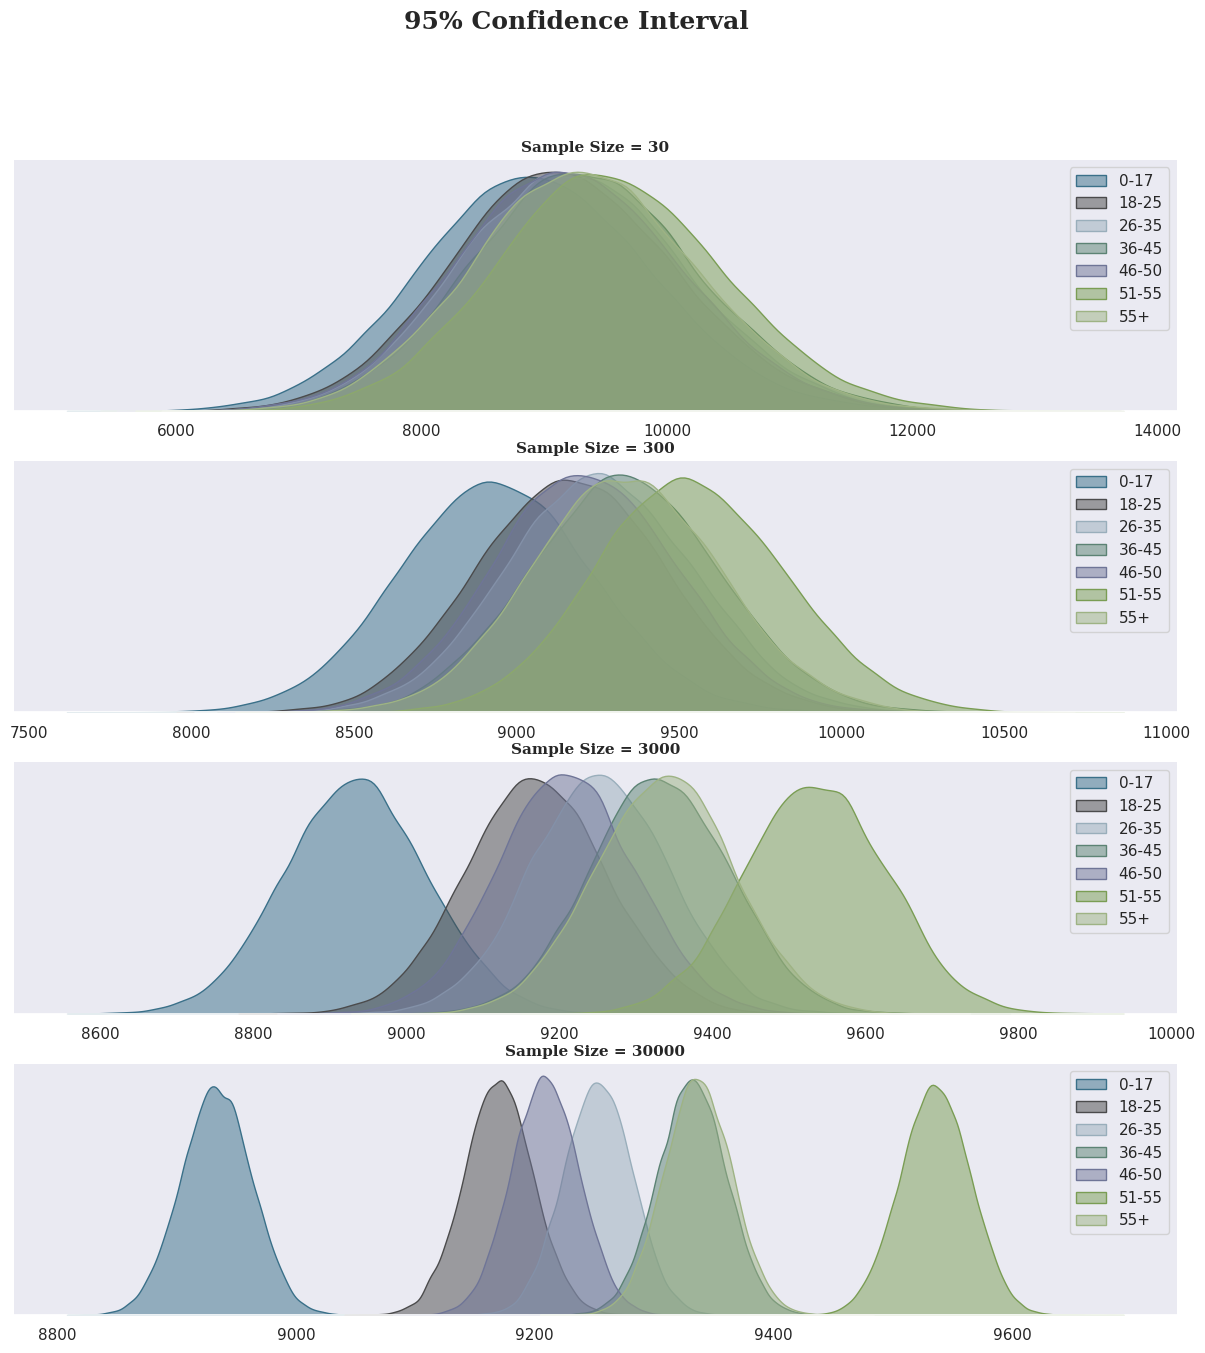

In [137]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

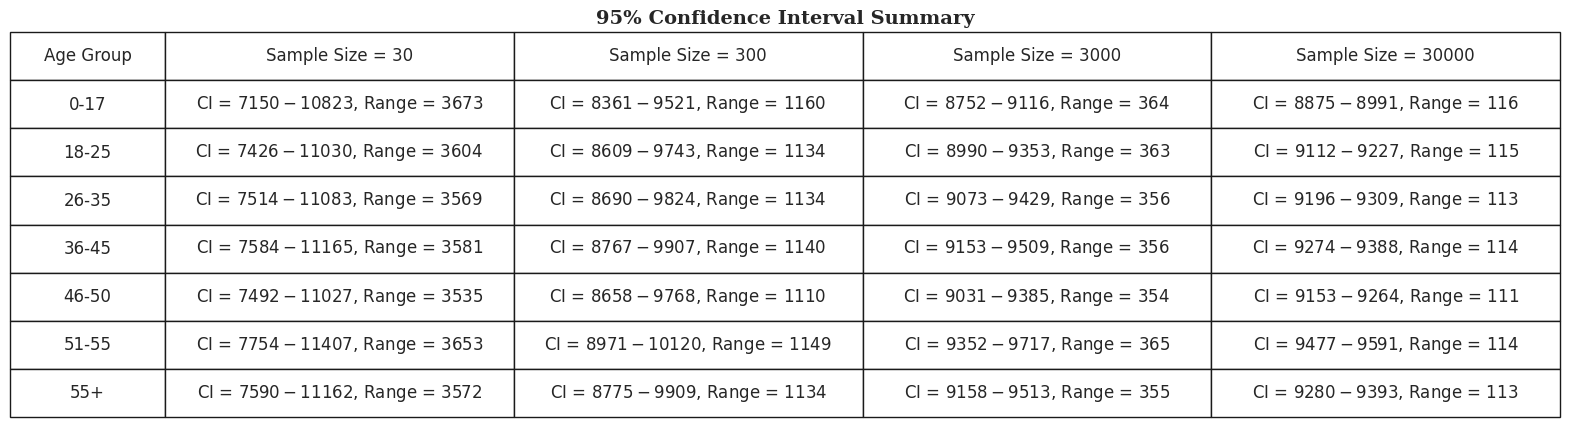

In [139]:
fig,ax = plt.subplots(figsize = (20,5))
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']
samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]
for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")

ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 30','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])
table.set_fontsize(13)
ax.axis('off')
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})
plt.show()

**Insights**

**Confidence Interval by Gender**
* Average amount spend by male customer will lie in between: (895617.83, 955070.97)
* Average amount spend by female customer will lie in between: (673254.77, 750794.02)

**Confidence Interval by Marital_Status**
* Married confidence interval of means: (806668.83, 880384.76)
* Unmarried confidence interval of means: (848741.18, 912410.38)

**Confidence Interval by Age**
* For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
* For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
* For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
* For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
* For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
* For age 55+ --> confidence interval of means: (476948.26, 602446.23)
* For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

**Recommendations**

* **Gender-Specific Recommendations:**

Target Male Customer Retention and Acquisition, Recognizing that men spend more than women, the company should prioritize retaining existing male customers and attracting new ones.

Tailored Marketing for Females, Since females generally spend less, the company should develop targeted marketing strategies to address their specific needs and potentially increase their spending.

* **Product Category Strategy:**

Products in categories 1, 5, 8, and 11 show high purchasing frequency, indicating customer preferences. The company should focus on increasing sales of these products and explore strategies to promote less-purchased items.

* **Focusing on Unmarried Customers:**

Unmarried customers exhibit higher spending compared to married customers. The company should concentrate on acquiring and retaining unmarried customers.

* **Age-Specific Marketing:**

1.   Engage Younger Consumers with Incentives (0-17 Years),Customers in the 0-17 age
group have the lowest spending per transaction. To attract more young shoppers, the company can offer games and incentives tailored to the preferences of the younger generation, creating a more engaging and enjoyable shopping environment. Implementing special offers and games for the 0-17 age group can attract families and boost sales.
2.   Attract Younger Shoppers with Games(18-25), Introducing games in the mall can attract a younger audience and contribute to increased sales. Management should explore interactive strategies to engage younger customers.
1.   Tailor Offerings (26-45),  Given that the age group 26-45 drives the majority of sales, Walmart should tailor its product selection offering exclusive deals on popular products.
2.   Enhance Shopping Experience for Age Group 51-55, The 51-55 age group exhibits the highest spending per transaction. Walmart can enhance their shopping experience through exclusive pre-sale access, special discounts, and personalized recommendations.


* **City_Category C Revenue Boost:**

Male customers in City_Category C spend more than those in other categories. Increasing product offerings and marketing efforts targeting the males in City_Category C can enhance overall revenue.
